In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

In [2]:
## loading dataset
df = pd.read_csv('ML_Artivatic_dataset\\train_indessa.csv')
df_train = pd.read_csv('ML_Artivatic_dataset\\train_indessa.csv')

In [3]:
def heatMap(df_train,expectation1=None,expectation2=None):
    df = pd.read_csv('summary.csv')
    if expectation2==None:
        cols = df[(df.expectations==expectation1) |(df.feature=='loan_status')].feature
    elif expectation1 == None:
        cols = df_train.feature
    else:
        cols = df[(df.expectations==expectation2) | (df.expectations==expectation1) |(df.feature=='loan_status')].feature
    corrmat = df_train[cols].corr()
    f, ax = plt.subplots(figsize=(18, 9))
    sns.heatmap(corrmat, square=True)
    return

# cols = df[df.expectations=='high'].feature
# df_train[cols].describe(include=['O'])

def pivot(col): ### pivot_table for two categorical features one being loan_status
    return pd.pivot_table(df_train,'member_id',index=[col],columns=['loan_status'],aggfunc='count')

def group(col): ### create group of two categorical feature one being loan_status
    return df_train[[col,'loan_status']].groupby([col],as_index=False).mean().sort_values(by='loan_status',ascending=False)

def plot_bar(col):
    df = pivot(col)
    name_x = list(df.index)
    y1 = df[1].values/532428.0
    y0 = df[0].values/532428.0
    x = np.array(range(1,len(name_x)+1))
    

    fig= plt.figure()
    ax = fig.add_subplot(111)
    ax.bar(x-0.25,y0,width=0.25,color='r')
    ax.bar(x,y1,width=0.25,color='b')
    
    ax.set_ylabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(x)
    ax.set_xticklabels(name_x)
    ax.legend(['0','1'], loc='upper right')
    plt.xticks(rotation=70)
    plt.show()
    return

def plot_hist(df,col,bin_size,log=None):
    fig = plt.figure(figsize=(30, 6))
    ax = fig.add_subplot(111)
    if log==True:
        x0 = np.log(df[df.loan_status==0][col].dropna().values+1)
        x1 = np.log(df[df.loan_status==1][col].dropna().values+1)
        min_ = min(np.log(df[col].dropna().values+1))
        max_ = max(np.log(df[col].dropna().values+1))
        bins = np.linspace(min_,max_,bin_size)
    else:
        x0 = df[df.loan_status==0][col].dropna().values
        x1 = df[df.loan_status==1][col].dropna().values
        bins = np.linspace(df[col].min(),df[col].max(),bin_size)
    ax.hist(x1,bins=bins,label='1',color='b',alpha=0.5)
    ax.hist(x0,bins=bins,label='0',color='g',alpha=0.5)
    ax.set_ylabel("total members")
    ax.set_xlabel(col)
    ax.set_title("{} vs defaulter(0,1)".format(col))
    ax.set_xticks(bins)
    plt.xticks(rotation=70)
    plt.legend(loc='upper right')
    plt.show()
    return

def plot_box0(df,col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x0 = df[df.loan_status==0][col].dropna().values
    ax.boxplot(x0)
    ax.set_ylabel("{}-0".format(col))
    ax.set_title("{} vs defaulter(0,1)".format(col))
    plt.show()
    return

def plot_box1(df,col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x1 = df[df.loan_status==1][col].dropna().values
    ax.boxplot(x1)
    ax.set_ylabel("{}-1".format(col))
    ax.set_title("{} vs defaulter(0,1)".format(col))
    plt.show()
    return
def plot_scatter_box(df,col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x0 = df[df.loan_status==0][col].dropna().values
    y0 = np.array([1]*len(x0))
    x1 = df[df.loan_status==1][col].dropna().values
    y1 = np.array([4]*len(x1))
    print(len(x0),len(x1))
    
    ax.scatter(x0,y0,color='r',label='0')
    ax.scatter(x1,y1,color='b',label='1')
    ax.set_title("{} vs defaulters(0,1)".format(col))
    ax.set_xlabel(col)
    ax.legend(['0','1'],loc = 'upper right')
    plt.show()
    return

def get_train_test():
    df_train = pd.read_csv('ML_Artivatic_dataset\\train_indessa.csv')
    df_test = pd.read_csv('ML_Artivatic_dataset\\test_indessa.csv')
    df = pd.concat([df_train,df_test],ignore_index=True)
    return df

# this filter select all objet but slect only those int and float
# which was slected by first dirty implementation
def get_duo_filter1():
    df_duo = get_train_test()
    col_int = ['acc_now_delinq','annual_inc','collection_recovery_fee','delinq_2yrs','dti','funded_amnt','inq_last_6mths','int_rate','open_acc','pub_rec','tot_coll_amt','tot_cur_bal','total_acc','loan_status','revol_bal']
    col_obj = [col for col in df_duo.columns if str(df_duo[col].dtype)=='object']
    cols = col_obj + col_int
    return df_duo[cols]


def dummy_it(df,col_old,col_new):
    df_col_new = pd.get_dummies(df[col_new],prefix = col_new)
    df = pd.concat([df,df_col_new],axis=1)
    return df.drop([col_old,col_new],axis=1)

def dummy_it_simple(df,col):
    df_col = pd.get_dummies(df[col],prefix = col)
    df = pd.concat([df,df_col],axis=1)
    return df.drop([col],axis=1)

def freq(df,col):
    print("max",df[col].max())
    print("min",df[col].min())
    return df[col].value_counts()

def plot_boxes(df,col):
    plot_box0(df,col)
    plot_box1(df,col)
    plot_scatter_box(df,col)
    return

def descp(df,col):
    print(df[col].describe())
    return freq(df,col)

def log_it(df,col):
    df.loc[df[col].notnull(),col] = np.log(df[col].dropna().values+1)
    return df

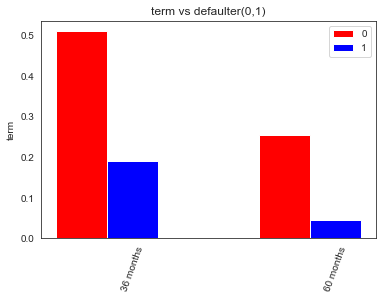

In [4]:
plot_bar('term')

In [5]:
group('term')

,term,loan_status
0,36 months,0.272733
1,60 months,0.151308


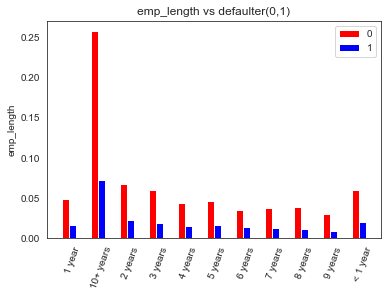

In [6]:
plot_bar('emp_length')

In [7]:
group('emp_length')

,emp_length,loan_status
6,6 years,0.281186
5,5 years,0.267212
7,7 years,0.260045
4,4 years,0.257750
2,2 years,0.250338
0,1 year,0.249518
10,< 1 year,0.245971
3,3 years,0.241826
9,9 years,0.229457
8,8 years,0.225806


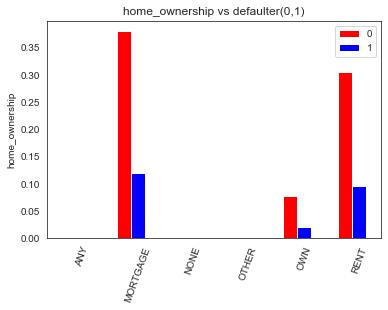

In [8]:
plot_bar('home_ownership')

In [9]:
print(group('home_ownership'))
pivot('home_ownership')

  home_ownership  loan_status
2           NONE     0.777778
3          OTHER     0.769231
0            ANY     0.333333
5           RENT     0.239554
1       MORTGAGE     0.239137
4            OWN     0.207485


loan_status,0,1
home_ownership,,
ANY,2,1
MORTGAGE,202344,63596
NONE,8,28
OTHER,27,90
OWN,41737,10927
RENT,162483,51185


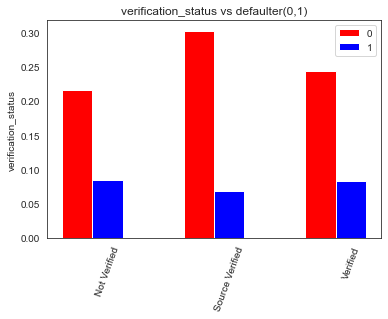

In [10]:
plot_bar('verification_status')

In [11]:
print(group('verification_status'))
pivot('verification_status')

  verification_status  loan_status
0        Not Verified     0.280967
2            Verified     0.254479
1     Source Verified     0.184177


loan_status,0,1
verification_status,,
Not Verified,115028,44948
Source Verified,161329,36421
Verified,130244,44458


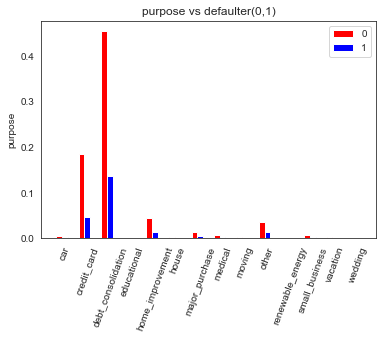

In [12]:
plot_bar('purpose')

In [13]:
print(group('purpose'))
pivot('purpose')

               purpose  loan_status
3          educational     0.792308
13             wedding     0.743041
5                house     0.383410
10    renewable_energy     0.371601
0                  car     0.367262
11      small_business     0.332574
6       major_purchase     0.318456
8               moving     0.300956
12            vacation     0.273826
9                other     0.272220
7              medical     0.271839
4     home_improvement     0.248625
2   debt_consolidation     0.231840
1          credit_card     0.206162


loan_status,0,1
purpose,,
car,3332,1934
credit_card,98174,25496
debt_consolidation,241962,73027
educational,54,206
home_improvement,23358,7729
house,1338,832
major_purchase,7009,3275
medical,3726,1391
moving,2267,976


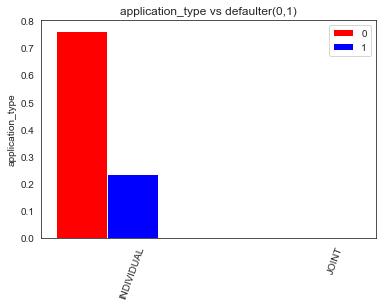

In [14]:
plot_bar('application_type')

In [15]:
print(group('application_type'))
pivot('application_type')

  application_type  loan_status
0       INDIVIDUAL     0.236460
1            JOINT     0.003279


loan_status,0,1
application_type,,
INDIVIDUAL,406297,125826
JOINT,304,1


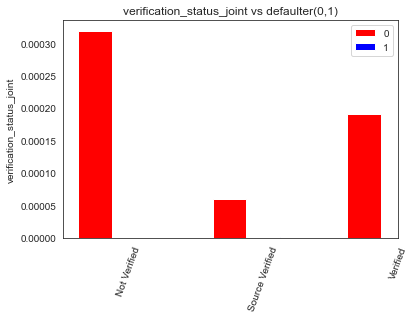

In [16]:
plot_bar('verification_status_joint')

In [17]:
print(group('verification_status_joint'))
pivot('verification_status_joint')

  verification_status_joint  loan_status
1           Source Verified     0.030303
0              Not Verified     0.000000
2                  Verified     0.000000


loan_status,0,1
verification_status_joint,,
Not Verified,170.0,NaN
Source Verified,32.0,1.0
Verified,102.0,NaN


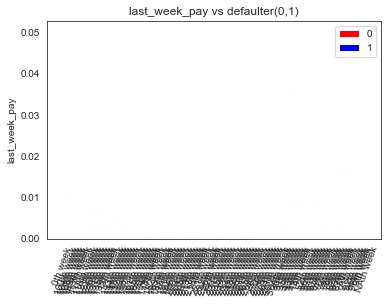

In [18]:
plot_bar('last_week_pay')

In [19]:
print(group('last_week_pay'))
pivot('last_week_pay')

   last_week_pay  loan_status
39    205th week     1.000000
69    304th week     1.000000
68    300th week     1.000000
67    291th week     1.000000
66    283th week     1.000000
..           ...          ...
71     31th week     0.087932
75     44th week     0.070066
61    269th week     0.000000
65    278th week     0.000000
97     NAth week     0.000000

[98 rows x 2 columns]


loan_status,0,1
last_week_pay,,
0th week,107.0,714.0
100th week,5742.0,2567.0
104th week,5350.0,2353.0
108th week,25.0,162.0
109th week,5756.0,2082.0
...,...,...
92th week,38.0,202.0
95th week,2193.0,503.0
96th week,4564.0,2246.0


In [20]:
print(group('grade')) 
pivot('grade')

  grade  loan_status
0     A     0.268879
1     B     0.263278
6     G     0.235952
3     D     0.217167
2     C     0.216408
5     F     0.209171
4     E     0.186893


loan_status,0,1
grade,,
A,65148,23959
B,112507,40206
C,115579,31920
D,65419,18148
E,34553,7942
F,10934,2892
G,2461,760


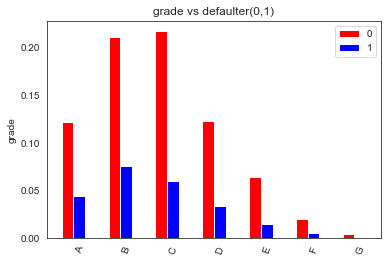

In [21]:
plot_bar('grade')

In [22]:
print(group('pymnt_plan'))
pivot('pymnt_plan')

  pymnt_plan  loan_status
1          y     0.250000
0          n     0.236327


loan_status,0,1
pymnt_plan,,
n,406595,125825
y,6,2


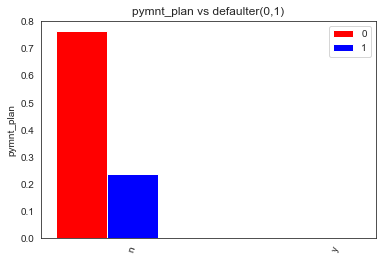

In [23]:
plot_bar('pymnt_plan')

In [24]:
print(group('addr_state'))
pivot('addr_state')

   addr_state  loan_status
12         IA     0.714286
13         ID     0.571429
7          DC     0.309411
4          CA     0.277984
44         UT     0.275790
11         HI     0.269131
0          AK     0.266716
47         WA     0.259259
37         OR     0.257291
5          CO     0.255586
26         MT     0.253074
19         MA     0.252887
45         VA     0.249716
3          AZ     0.249188
41         SD     0.247479
50         WY     0.246244
33         NV     0.242846
20         MD     0.240783
30         NH     0.240654
34         NY     0.236567
31         NJ     0.235885
39         RI     0.234281
10         GA     0.233287
9          FL     0.231360
23         MN     0.230657
27         NC     0.230624
43         TX     0.229619
18         LA     0.229537
49         WV     0.228298
24         MO     0.227454
32         NM     0.227181
40         SC     0.226820
17         KY     0.225486
48         WI     0.225291
6          CT     0.223282
1          AL     0.221078
1

loan_status,0,1
addr_state,,
AK,987,359
AL,5218,1481
AR,3121,867
AZ,9250,3070
CA,56253,21658
CO,8362,2871
CT,6272,1803
DC,1020,457
DE,1180,332


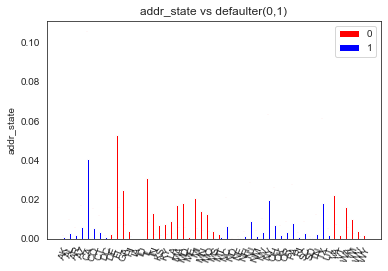

In [25]:
plot_bar('addr_state')

In [26]:
print(group('initial_list_status'))
pivot('initial_list_status')

  initial_list_status  loan_status
0                   f     0.330993
1                   w     0.135943


loan_status,0,1
initial_list_status,,
f,183320,90698
w,223281,35129


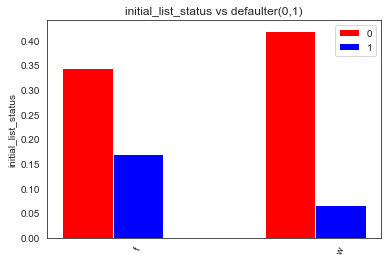

In [27]:
plot_bar('initial_list_status')

In [28]:
print(df['collection_recovery_fee'].describe())
freq(df,'collection_recovery_fee')

count    532428.000000
mean          4.859221
std          63.123361
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64
max 7002.19
min 0.0


0.0000      518423
2.0000          13
2.7300          10
3.7100           9
1.8000           9
             ...  
241.5672         1
27.0247          1
7.2218           1
1.6397           1
20.0790          1
Name: collection_recovery_fee, Length: 12617, dtype: int64

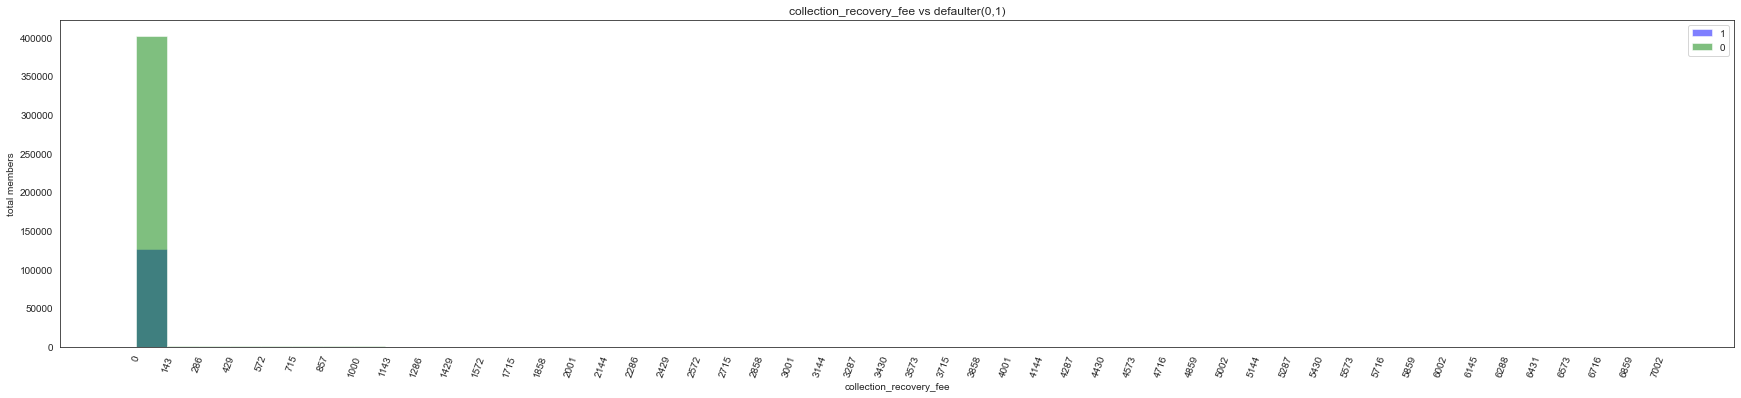

In [29]:
## 
plot_hist(df,'collection_recovery_fee',50)

In [30]:
print(df['recoveries'].describe())
freq(df,'recoveries')

count    532428.000000
mean         45.717832
std         409.647467
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64
max 33520.27
min 0.0


0.00       517723
200.00          7
11.70           6
100.00          5
10.92           5
            ...  
4049.45         1
2696.98         1
903.65          1
868.68          1
62.28           1
Name: recoveries, Length: 14024, dtype: int64

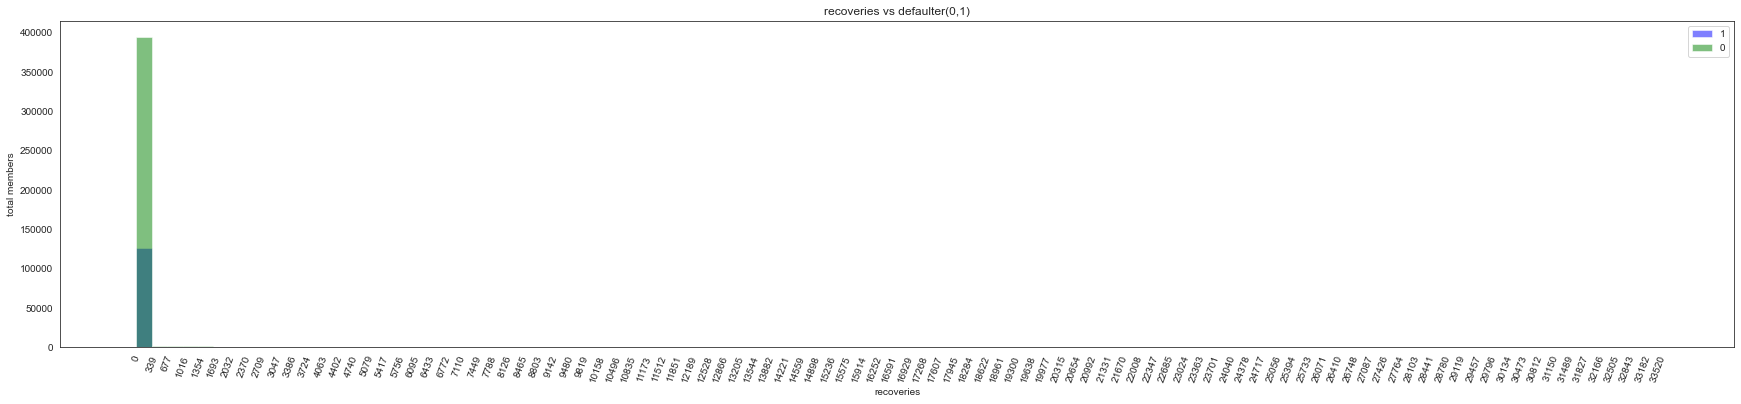

In [31]:
plot_hist(df,'recoveries',100)

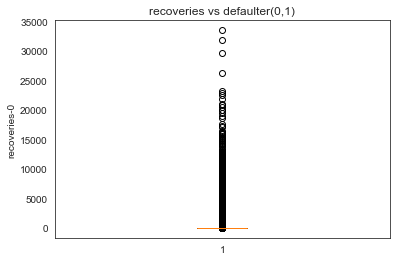

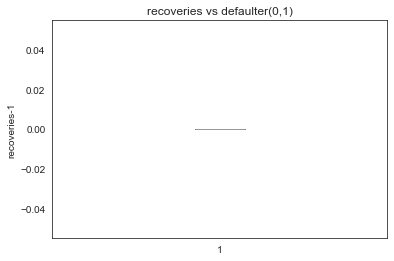

406601 125827


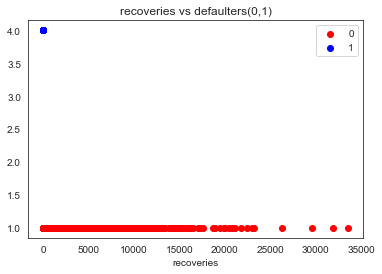

In [32]:
plot_boxes(df,'recoveries')

In [33]:
descp(df,'delinq_2yrs')

count    532412.000000
mean          0.314448
std           0.860045
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: delinq_2yrs, dtype: float64
max 30.0
min 0.0


0.0     430104
1.0      67947
2.0      20167
3.0       7269
4.0       3159
5.0       1622
6.0        898
7.0        451
8.0        266
9.0        166
10.0       116
11.0        73
12.0        61
13.0        37
14.0        28
15.0        14
16.0         9
18.0         8
17.0         6
19.0         4
21.0         2
24.0         1
22.0         1
26.0         1
27.0         1
30.0         1
Name: delinq_2yrs, dtype: int64

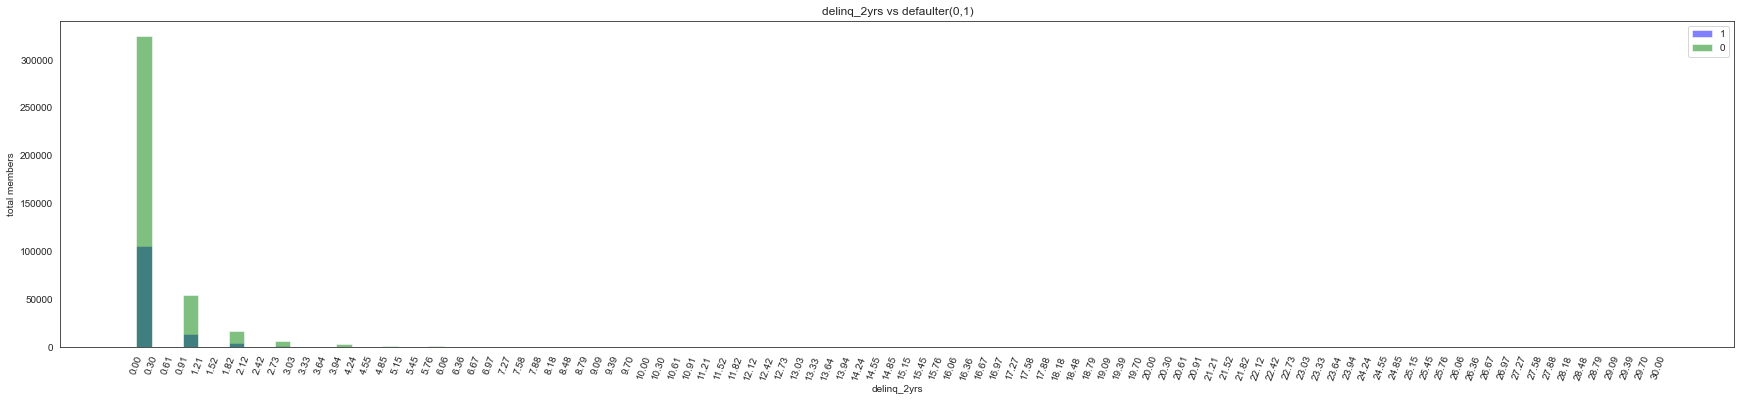

In [34]:
plot_hist(df,'delinq_2yrs',100)

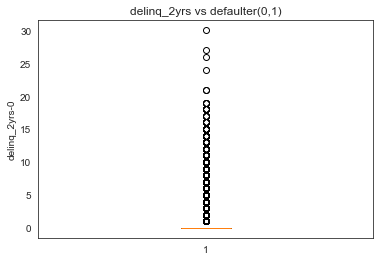

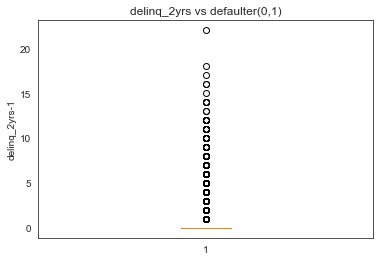

406598 125814


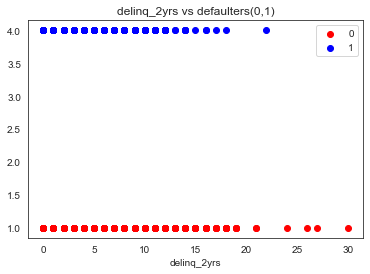

In [35]:
plot_boxes(df,'delinq_2yrs')

In [36]:
descp(df,'mths_since_last_delinq')

count    259874.000000
mean         34.055735
std          21.884797
min           0.000000
25%          15.000000
50%          31.000000
75%          50.000000
max         180.000000
Name: mths_since_last_delinq, dtype: float64
max 180.0
min 0.0


9.0      5163
6.0      5125
12.0     5037
7.0      5032
13.0     5017
         ... 
142.0       1
143.0       1
124.0       1
126.0       1
119.0       1
Name: mths_since_last_delinq, Length: 147, dtype: int64

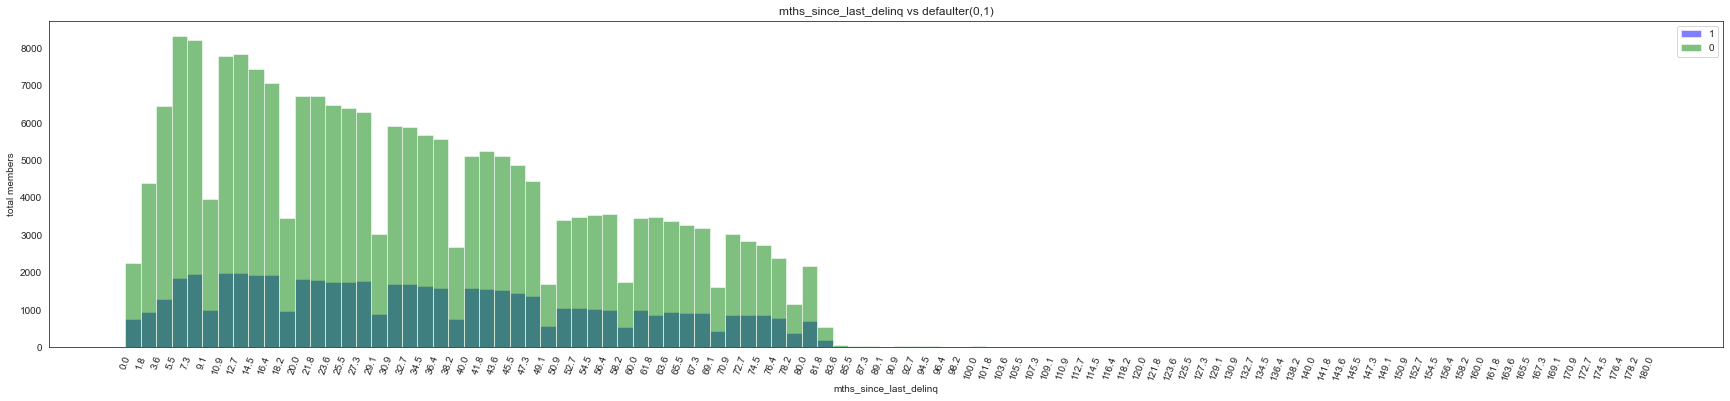

In [37]:
plot_hist(df,'mths_since_last_delinq',100)

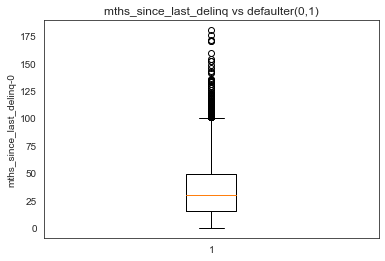

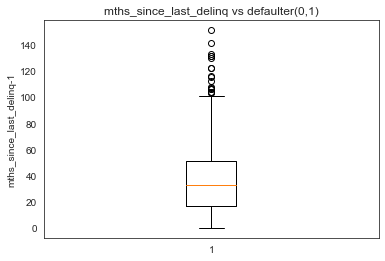

204007 55867


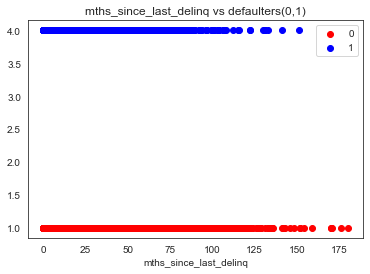

In [38]:
plot_boxes(df,'mths_since_last_delinq')

In [39]:
print(df['mths_since_last_major_derog'].describe())
freq(df,'mths_since_last_major_derog')

count    132980.000000
mean         44.121462
std          22.198410
min           0.000000
25%          27.000000
50%          44.000000
75%          61.000000
max         180.000000
Name: mths_since_last_major_derog, dtype: float64
max 180.0
min 0.0


45.0     2104
46.0     2092
42.0     2062
43.0     2042
37.0     2015
         ... 
176.0       1
162.0       1
171.0       1
165.0       1
180.0       1
Name: mths_since_last_major_derog, Length: 162, dtype: int64

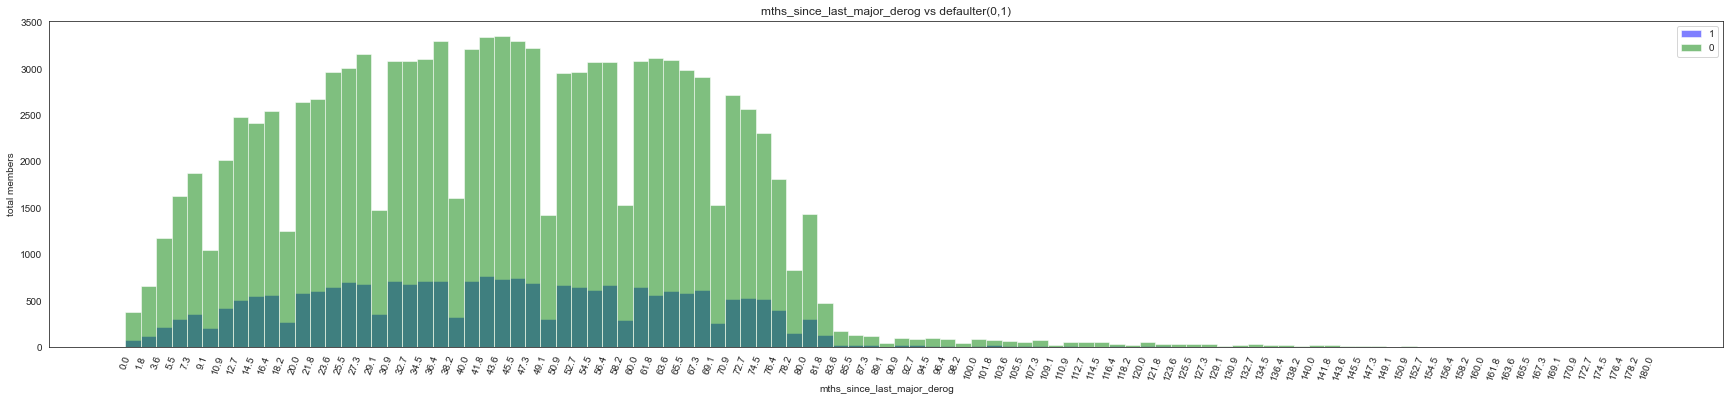

In [40]:
plot_hist(df,'mths_since_last_major_derog',100)

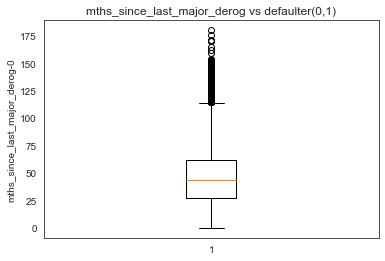

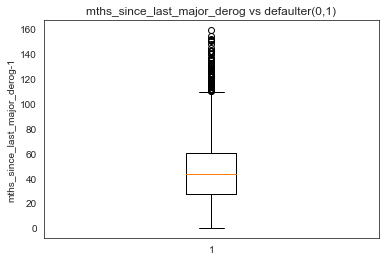

109757 23223


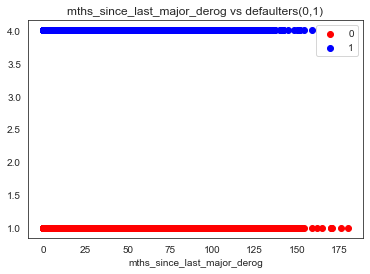

In [41]:
plot_boxes(df,'mths_since_last_major_derog')

In [42]:
descp(df,'funded_amnt')

count    532428.000000
mean      14744.271291
std        8429.139277
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64
max 35000
min 500


10000    37118
12000    30069
15000    28345
20000    28085
35000    21650
         ...  
750          1
34600        1
800          1
850          1
900          1
Name: funded_amnt, Length: 1370, dtype: int64

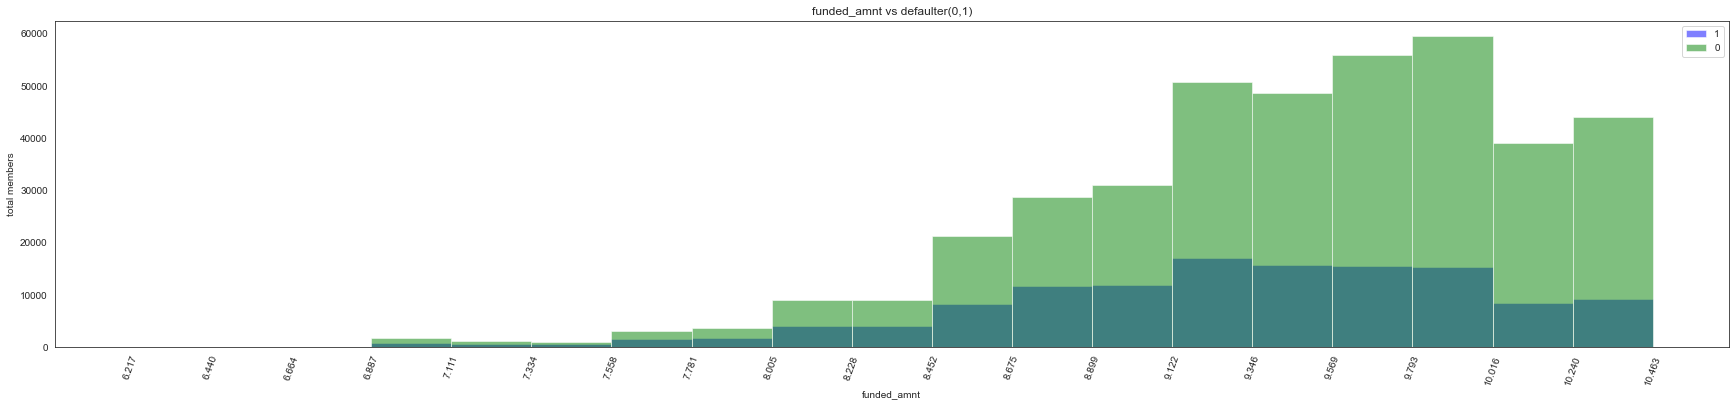

In [43]:
plot_hist(df,'funded_amnt',20,True)

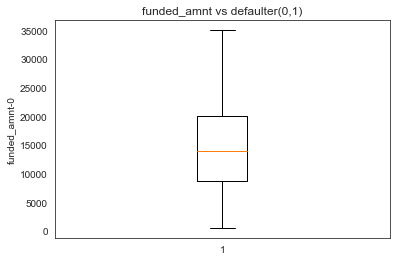

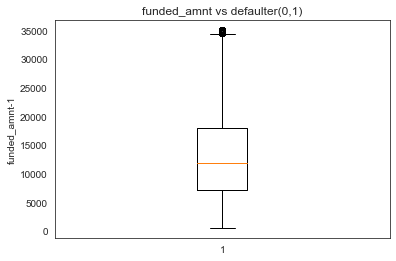

406601 125827


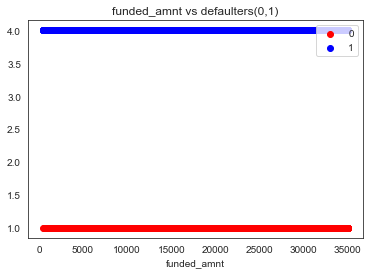

In [44]:
plot_boxes(df,'funded_amnt')

In [45]:
print(df['loan_amnt'].describe())
freq(df,'loan_amnt')

count    532428.000000
mean      14757.595722
std        8434.420080
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
max 35000
min 500


10000    37175
12000    30126
15000    28420
20000    28196
35000    21728
         ...  
900          1
800          1
34600        1
850          1
725          1
Name: loan_amnt, Length: 1370, dtype: int64

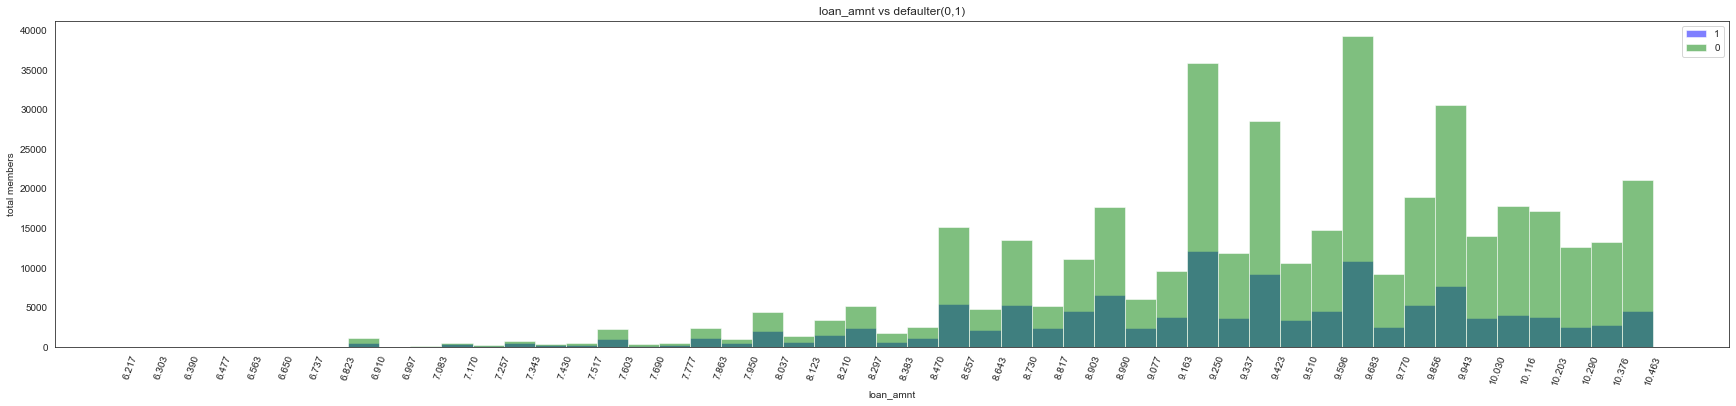

In [46]:
plot_hist(df,'loan_amnt',50,True)

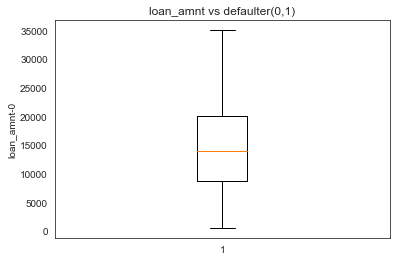

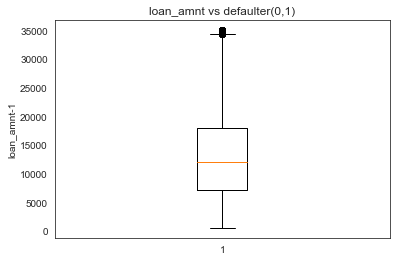

406601 125827


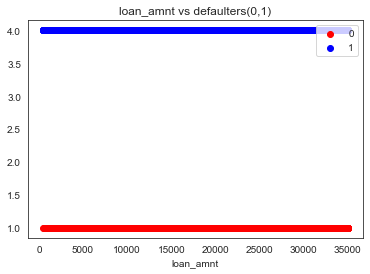

In [47]:
plot_boxes(df,'loan_amnt')

In [48]:
print(df['funded_amnt_inv'].describe())
freq(df,'funded_amnt_inv')

count    532428.000000
mean      14704.926696
std        8441.290381
min           0.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64
max 35000.0
min 0.0


10000.000000    33676
12000.000000    26981
15000.000000    25025
20000.000000    24198
35000.000000    17671
                ...  
4654.498505         1
8363.272710         1
23143.550000        1
11451.176604        1
23287.150797        1
Name: funded_amnt_inv, Length: 6442, dtype: int64

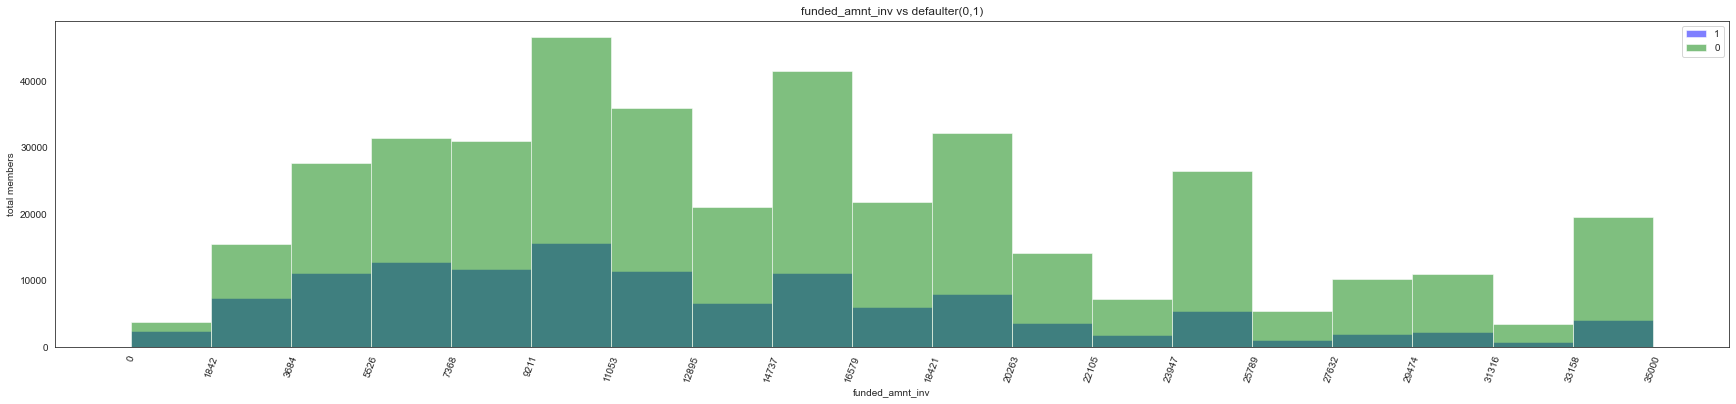

In [49]:
plot_hist(df,'funded_amnt_inv',20)

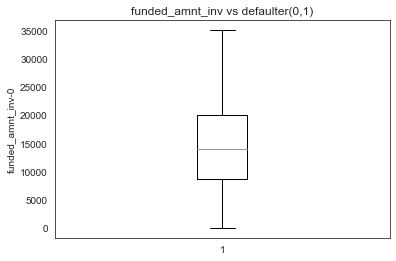

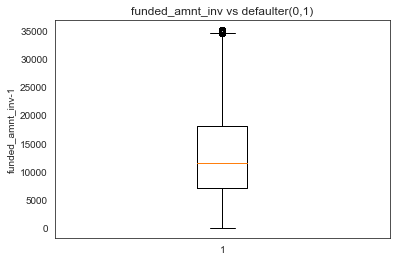

406601 125827


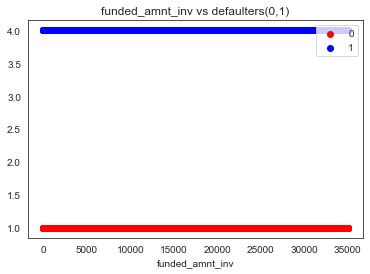

In [50]:
plot_boxes(df,'funded_amnt_inv')

In [51]:
print(df['open_acc'].describe())
freq(df,'open_acc')

count    532412.000000
mean         11.545594
std           5.311442
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          90.000000
Name: open_acc, dtype: float64
max 90.0
min 0.0


9.0     48345
10.0    47212
8.0     46065
11.0    43384
7.0     40501
        ...  
67.0        1
64.0        1
90.0        1
57.0        1
79.0        1
Name: open_acc, Length: 73, dtype: int64

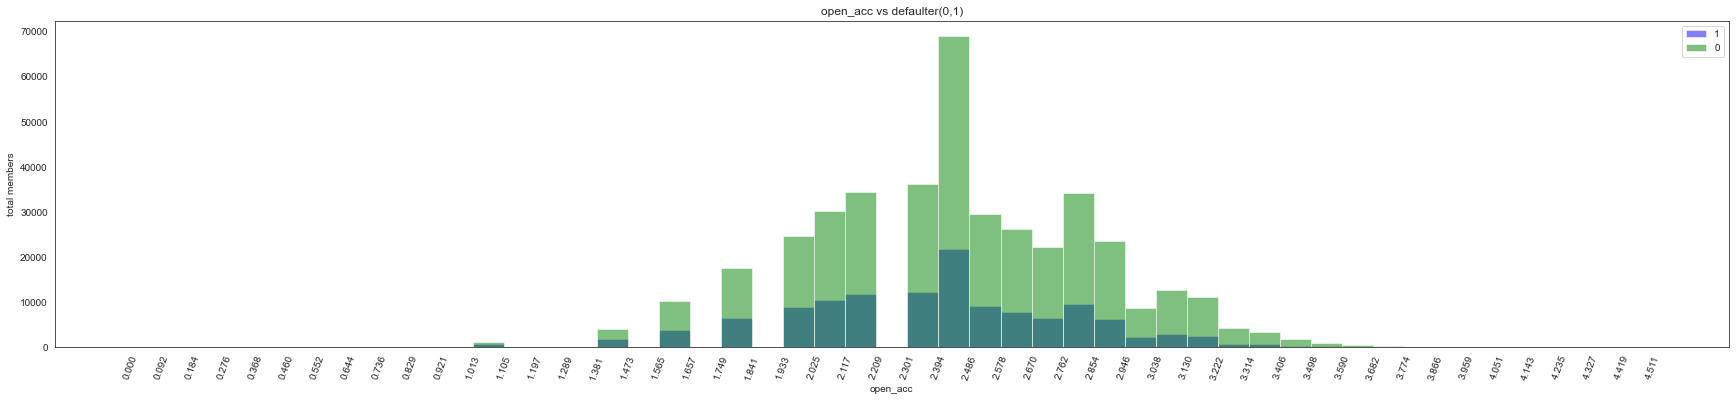

In [52]:
plot_hist(df,'open_acc',50,True)

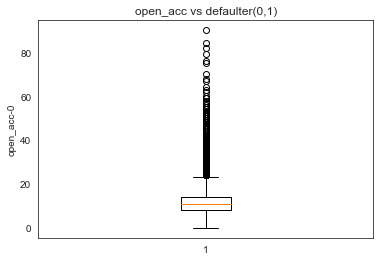

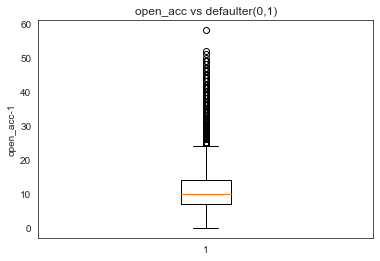

406598 125814


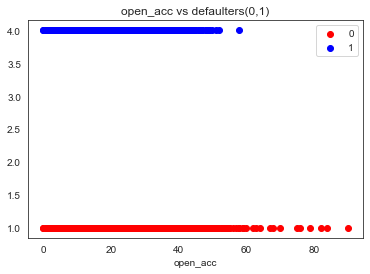

In [53]:
plot_boxes(df,'open_acc')

In [54]:
print(df['total_acc'].describe())
freq(df,'total_acc')

count    532412.000000
mean         25.267357
std          11.843211
min           1.000000
25%          17.000000
50%          24.000000
75%          32.000000
max         162.000000
Name: total_acc, dtype: float64
max 162.0
min 1.0


20.0     19338
22.0     19266
21.0     19099
19.0     19056
18.0     18738
         ...  
129.0        1
162.0        1
119.0        1
114.0        1
117.0        1
Name: total_acc, Length: 126, dtype: int64

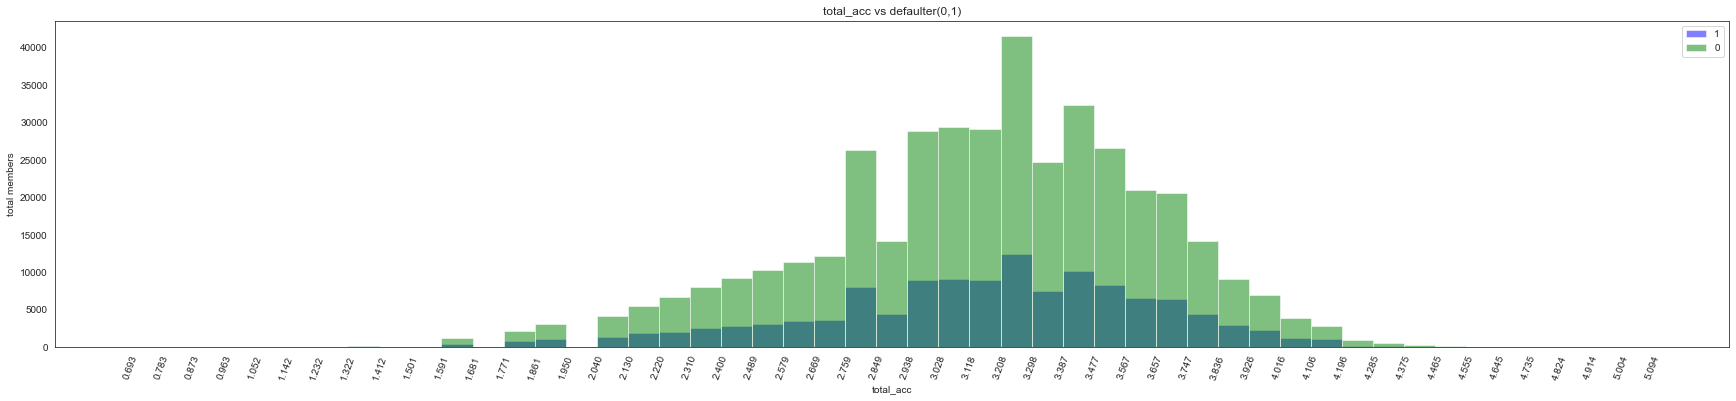

In [55]:
plot_hist(df,'total_acc',50,True)

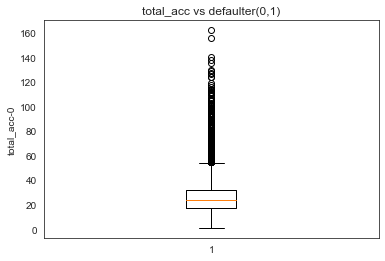

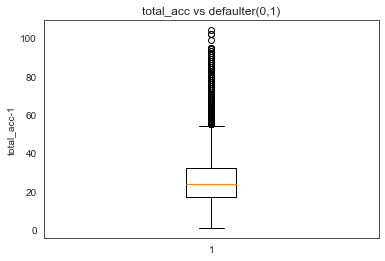

406598 125814


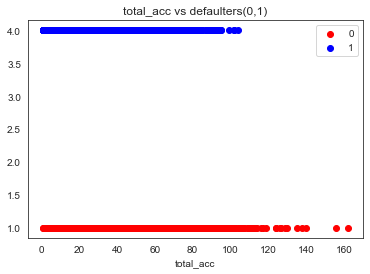

In [56]:
plot_boxes(df,'total_acc')

In [57]:
print(df['revol_bal'].describe())
freq(df,'revol_bal')

count    5.324280e+05
mean     1.692128e+04
std      2.242322e+04
min      0.000000e+00
25%      6.444000e+03
50%      1.187600e+04
75%      2.084300e+04
max      2.568995e+06
Name: revol_bal, dtype: float64
max 2568995.0
min 0.0


0.0         2017
5235.0        52
5399.0        46
5853.0        45
5466.0        45
            ... 
61781.0        1
58548.0        1
262947.0       1
49896.0        1
227255.0       1
Name: revol_bal, Length: 63459, dtype: int64

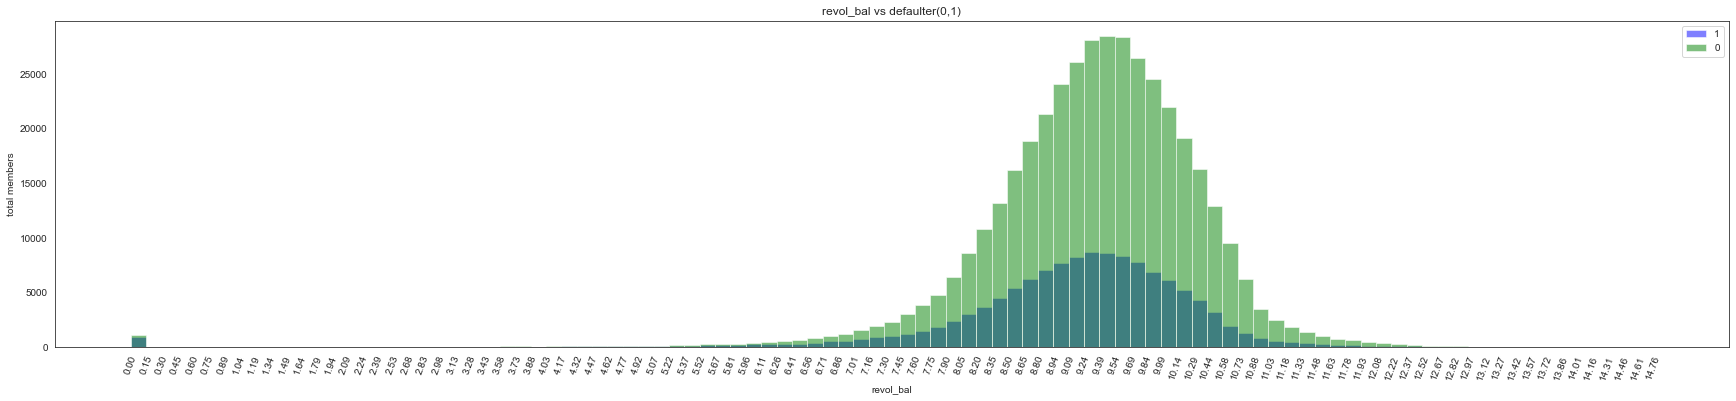

In [58]:
plot_hist(df,'revol_bal',100,True)

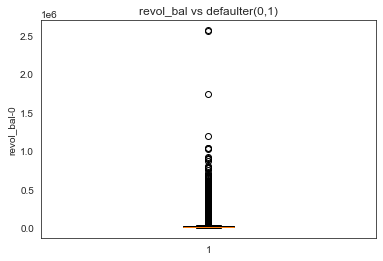

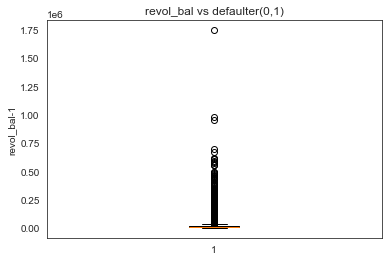

406601 125827


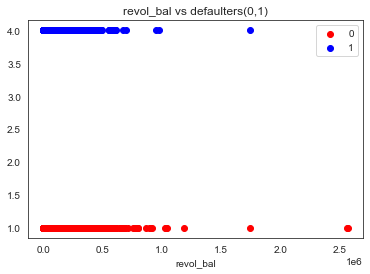

In [59]:
plot_boxes(df,'revol_bal')

In [60]:
print(df['total_rev_hi_lim'].describe())
freq(df,'total_rev_hi_lim')

count    4.904240e+05
mean     3.208057e+04
std      3.805304e+04
min      0.000000e+00
25%      1.400000e+04
50%      2.370000e+04
75%      3.980000e+04
max      9.999999e+06
Name: total_rev_hi_lim, dtype: float64
max 9999999.0
min 0.0


13500.0     1585
14500.0     1576
10000.0     1569
12000.0     1564
15000.0     1557
            ... 
173293.0       1
18587.0        1
17870.0        1
41820.0        1
466700.0       1
Name: total_rev_hi_lim, Length: 14697, dtype: int64

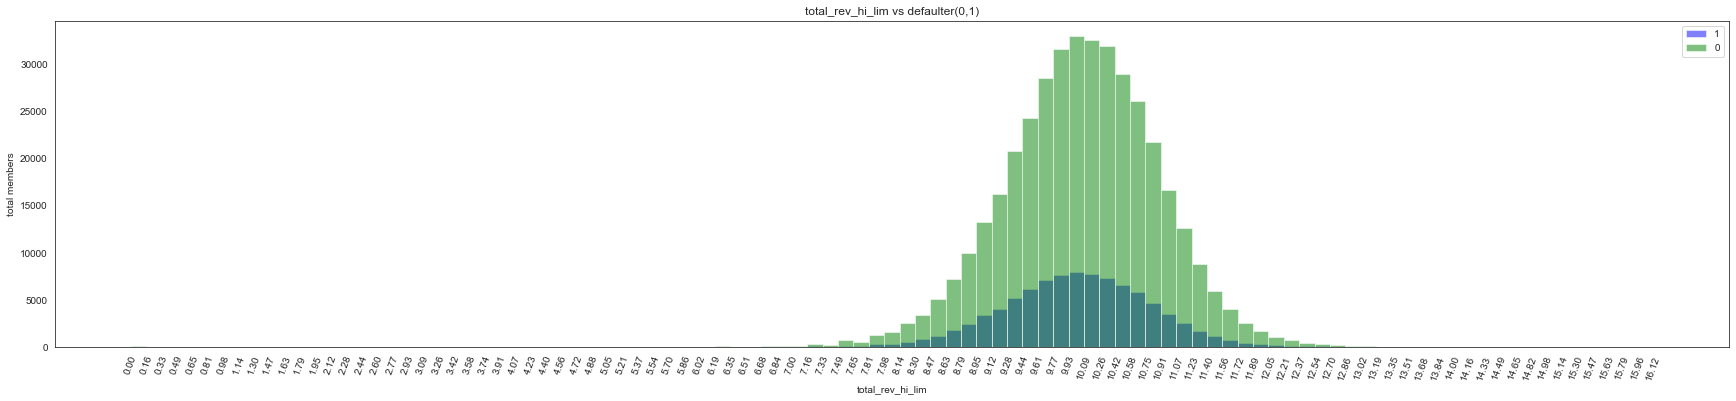

In [61]:
plot_hist(df,'total_rev_hi_lim',100,True)

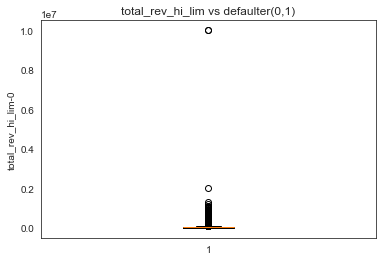

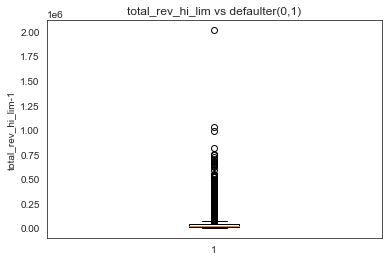

397921 92503


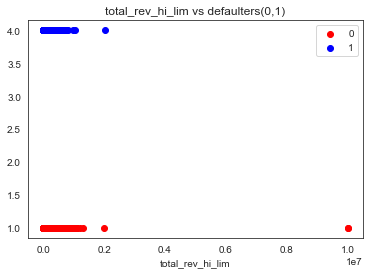

In [62]:
plot_boxes(df,'total_rev_hi_lim')

In [63]:
descp(df,'acc_now_delinq')

count    532412.000000
mean          0.005015
std           0.079117
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: acc_now_delinq, dtype: float64
max 14.0
min 0.0


0.0     529949
1.0       2304
2.0        134
3.0         16
4.0          5
5.0          2
14.0         1
6.0          1
Name: acc_now_delinq, dtype: int64

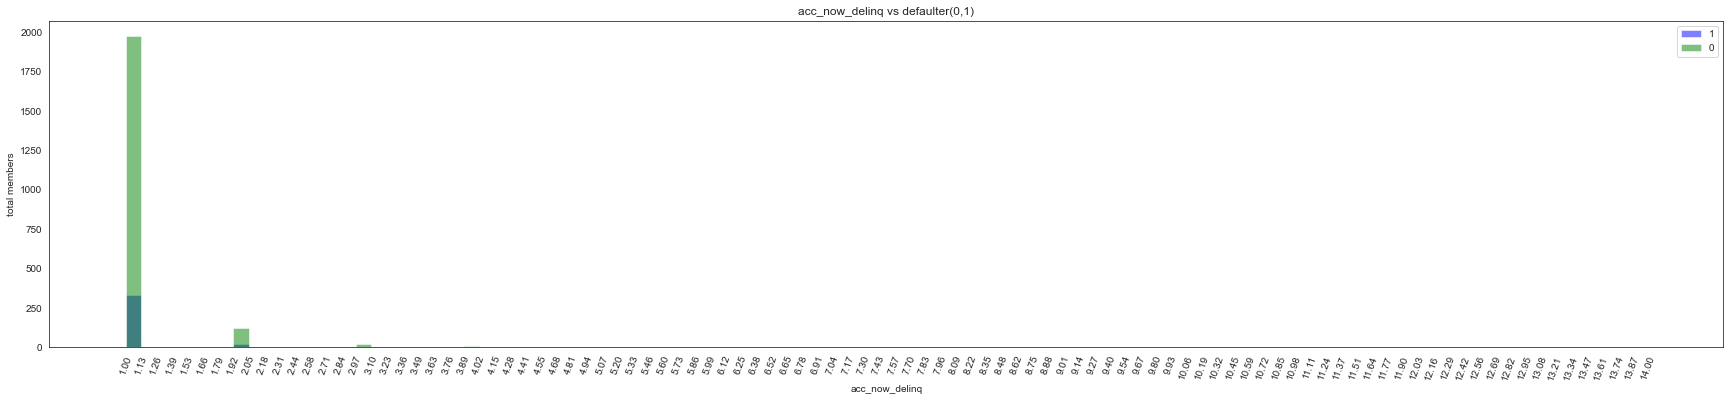

In [64]:
plot_hist(df[df.acc_now_delinq!=0],'acc_now_delinq',100)

In [65]:
# plot_boxes(df,'acc_now_delinq')

In [66]:
descp(df,'annual_inc')

count    5.324250e+05
mean     7.502984e+04
std      6.519985e+04
min      1.200000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64
max 9500000.0
min 1200.0


60000.00     20558
50000.00     18363
65000.00     15420
70000.00     14493
40000.00     14352
             ...  
18473.00         1
85318.00         1
58617.00         1
127270.00        1
24449.16         1
Name: annual_inc, Length: 33988, dtype: int64

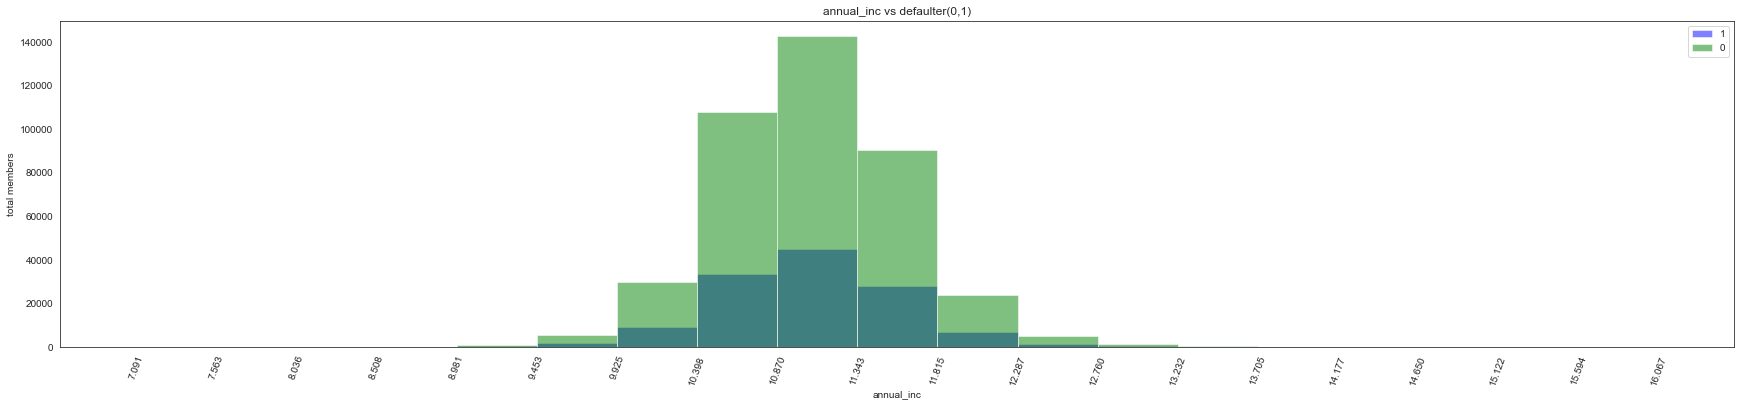

In [67]:
plot_hist(df,'annual_inc',20,True)

In [68]:
descp(df,'collections_12_mths_ex_med')

count    532333.000000
mean          0.014299
std           0.133005
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          16.000000
Name: collections_12_mths_ex_med, dtype: float64
max 16.0
min 0.0


0.0     525346
1.0       6494
2.0        416
3.0         53
4.0         15
5.0          6
16.0         1
14.0         1
7.0          1
Name: collections_12_mths_ex_med, dtype: int64

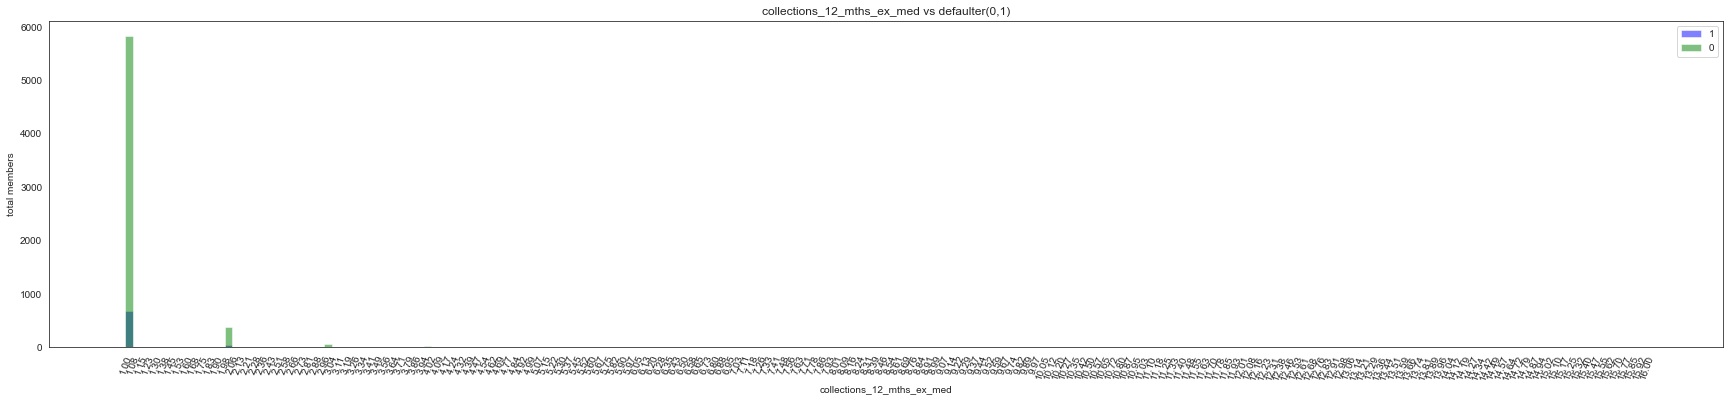

In [69]:
plot_hist(df[df.collections_12_mths_ex_med!=0],'collections_12_mths_ex_med',200)

In [70]:
descp(df,'dti')

count    532428.000000
mean         18.138767
std           8.369074
min           0.000000
25%          11.930000
50%          17.650000
75%          23.950000
max         672.520000
Name: dti, dtype: float64
max 672.52
min 0.0


14.40     410
19.20     399
18.00     390
16.80     385
15.60     380
         ... 
71.40       1
380.53      1
48.48       1
64.50       1
57.14       1
Name: dti, Length: 4058, dtype: int64

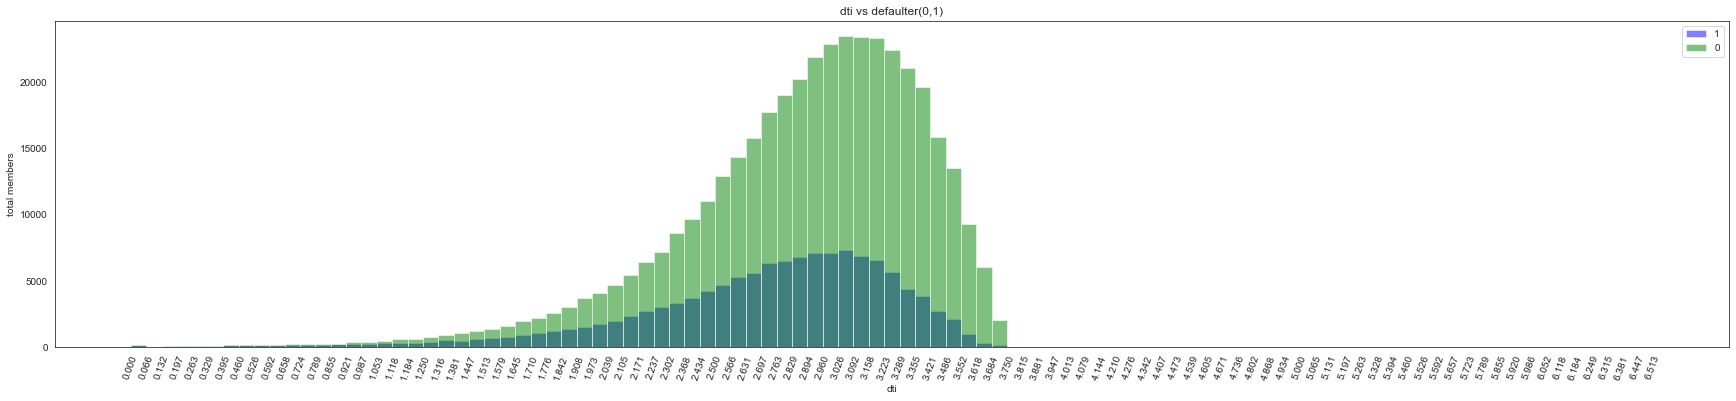

In [71]:
plot_hist(df,'dti',100,True)

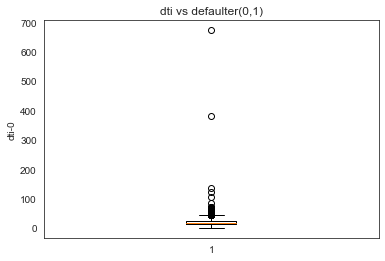

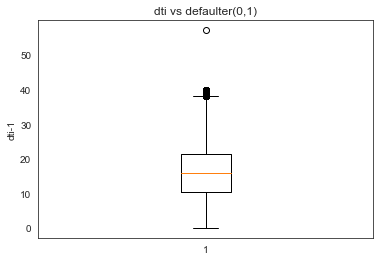

406601 125827


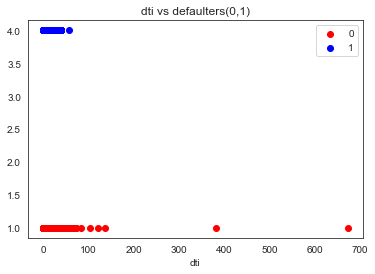

In [72]:
plot_boxes(df,'dti')

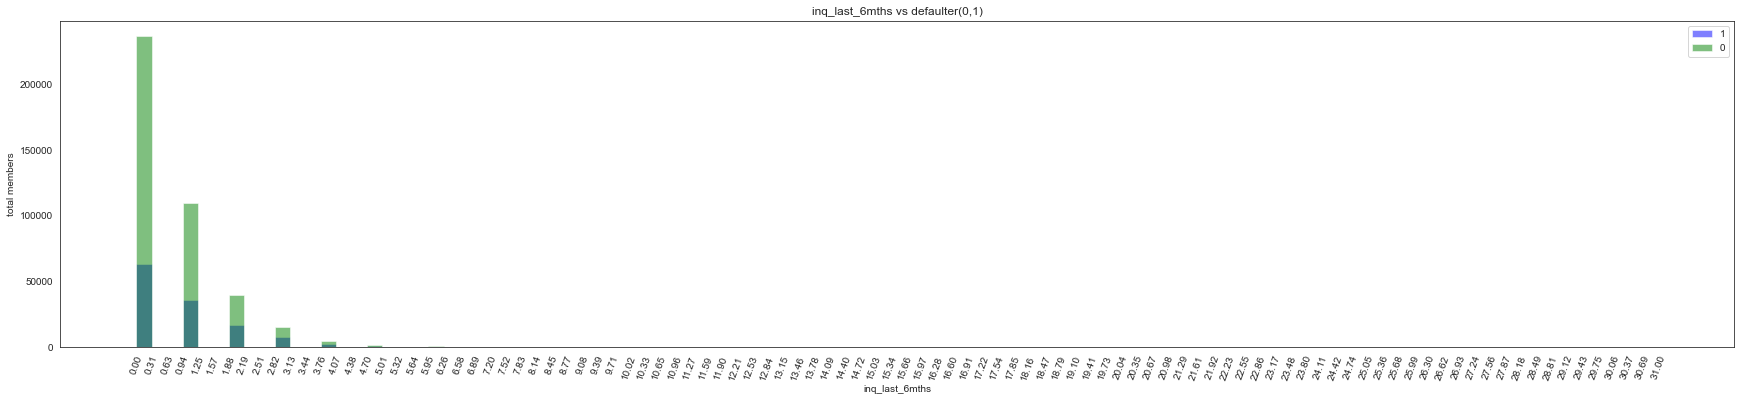

In [73]:
plot_hist(df,'inq_last_6mths',100)

In [74]:
# plot_boxes(df,'inq_last_6mths')

In [75]:
descp(df,'int_rate')

count    532428.000000
mean         13.242969
std           4.379611
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64
max 28.99
min 5.32


10.99    20609
9.17     15436
15.61    15207
9.99     13054
7.89     12219
         ...  
16.33        1
17.28        1
16.46        1
19.39        1
24.59        1
Name: int_rate, Length: 535, dtype: int64

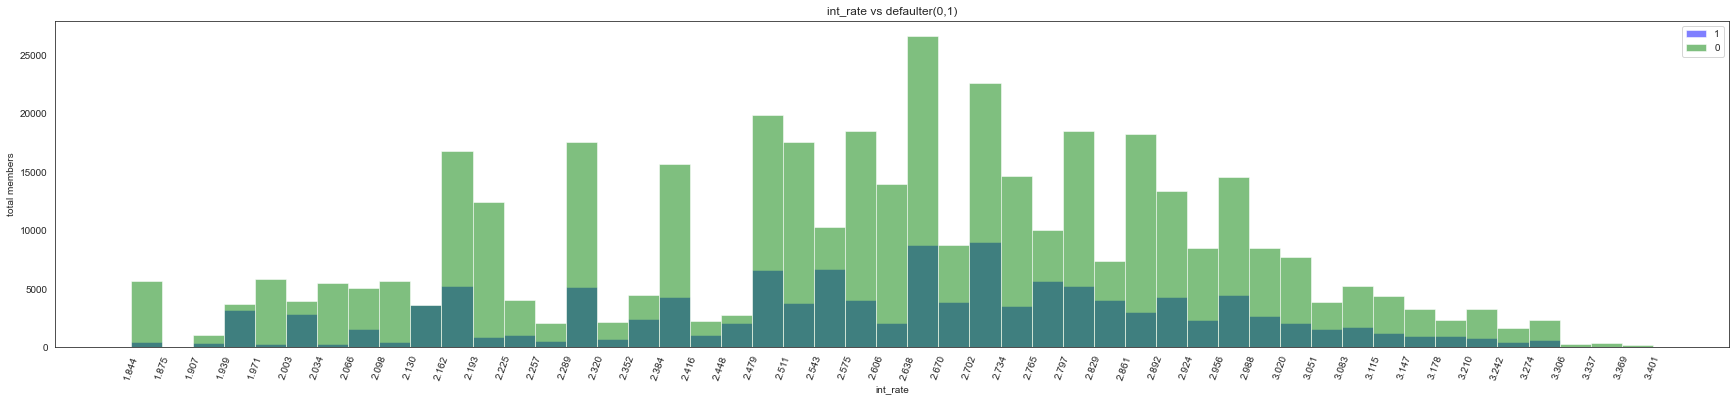

In [76]:
plot_hist(df,'int_rate',50,True)

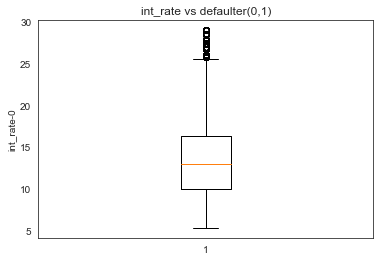

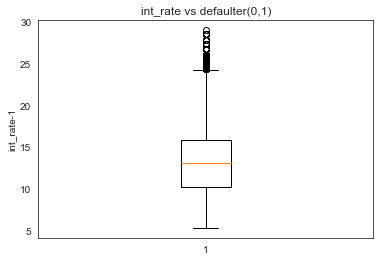

406601 125827


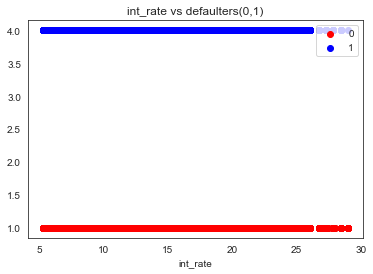

In [77]:
plot_boxes(df,'int_rate')

In [78]:
descp(df,'member_id')

count    5.324280e+05
mean     3.500547e+07
std      2.412148e+07
min      7.047300e+04
25%      1.086688e+07
50%      3.709590e+07
75%      5.848920e+07
max      7.354484e+07
Name: member_id, dtype: float64
max 73544841
min 70473


58720256    1
22421649    1
55247413    1
8073779     1
13318706    1
           ..
17482738    1
49992688    1
50996206    1
4862956     1
26216447    1
Name: member_id, Length: 532428, dtype: int64

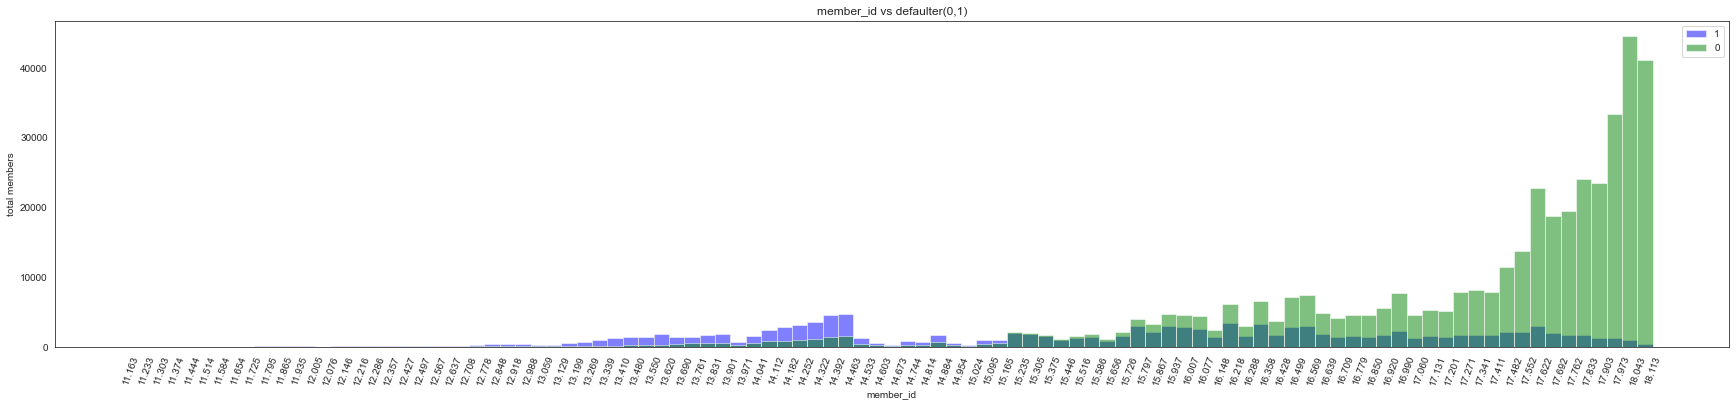

In [79]:
plot_hist(df,'member_id',100,True)

In [80]:
# plot_boxes(df,'member_id')

In [81]:
descp(df,'mths_since_last_record')

count    82123.000000
mean        70.093068
std         28.139219
min          0.000000
25%         51.000000
50%         70.000000
75%         92.000000
max        121.000000
Name: mths_since_last_record, dtype: float64
max 121.0
min 0.0


61.0     1180
68.0     1166
62.0     1157
69.0     1156
65.0     1156
         ... 
3.0        71
1.0        45
2.0        36
120.0       8
121.0       2
Name: mths_since_last_record, Length: 122, dtype: int64

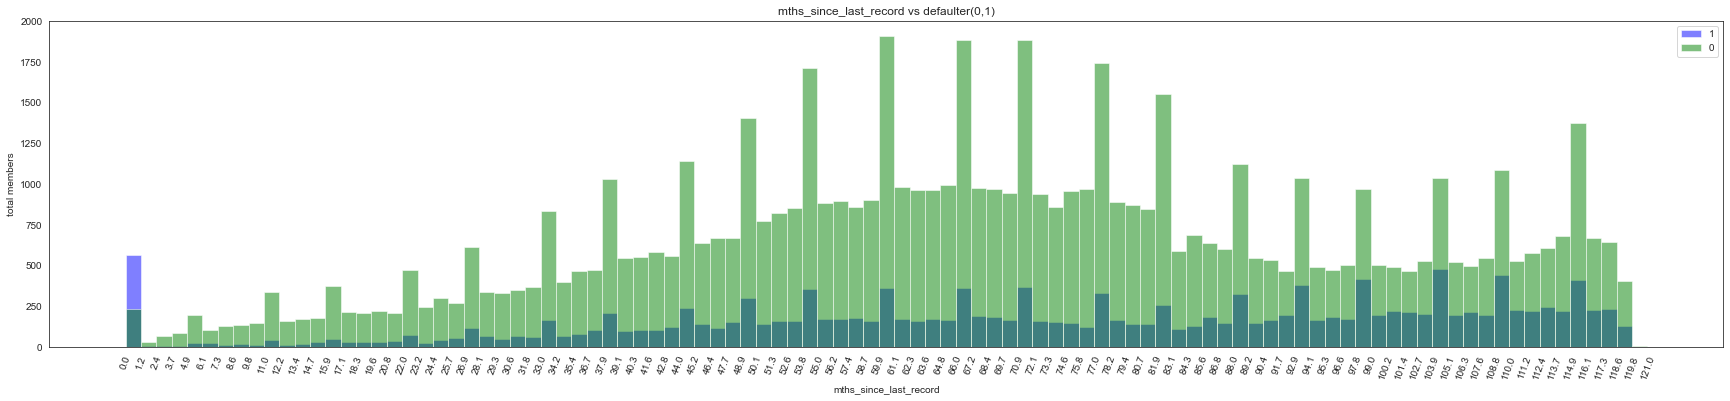

In [82]:
plot_hist(df,'mths_since_last_record',100)

In [83]:
# plot_boxes(df,'mths_since_last_record')

In [84]:
descp(df,'pub_rec')

count    532412.000000
mean          0.194858
std           0.583822
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64
max 86.0
min 0.0


0.0     451040
1.0      67938
2.0       8841
3.0       2692
4.0        974
5.0        424
6.0        238
7.0         97
8.0         67
9.0         23
10.0        23
11.0        16
12.0        12
13.0         7
21.0         4
16.0         3
15.0         2
86.0         1
22.0         1
28.0         1
18.0         1
63.0         1
49.0         1
20.0         1
23.0         1
17.0         1
14.0         1
40.0         1
Name: pub_rec, dtype: int64

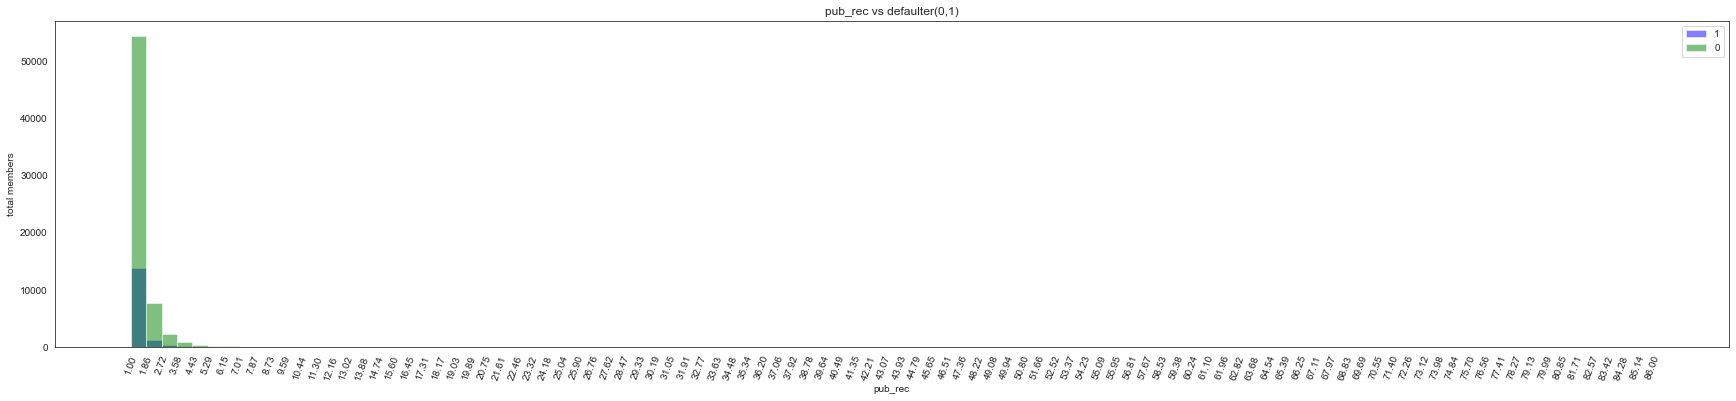

In [85]:
plot_hist(df[df.pub_rec!=0],'pub_rec',100)

In [86]:
# plot_boxes(df,'pub_rec')

In [87]:
descp(df,'revol_util')

count    532141.000000
mean         55.057189
std          23.853436
min           0.000000
25%          37.700000
50%          56.000000
75%          73.600000
max         892.300000
Name: revol_util, dtype: float64
max 892.3
min 0.0


0.00      2137
53.00     1124
58.00     1082
52.00     1054
62.00     1047
          ... 
113.70       1
109.80       1
109.60       1
117.60       1
5.79         1
Name: revol_util, Length: 1265, dtype: int64

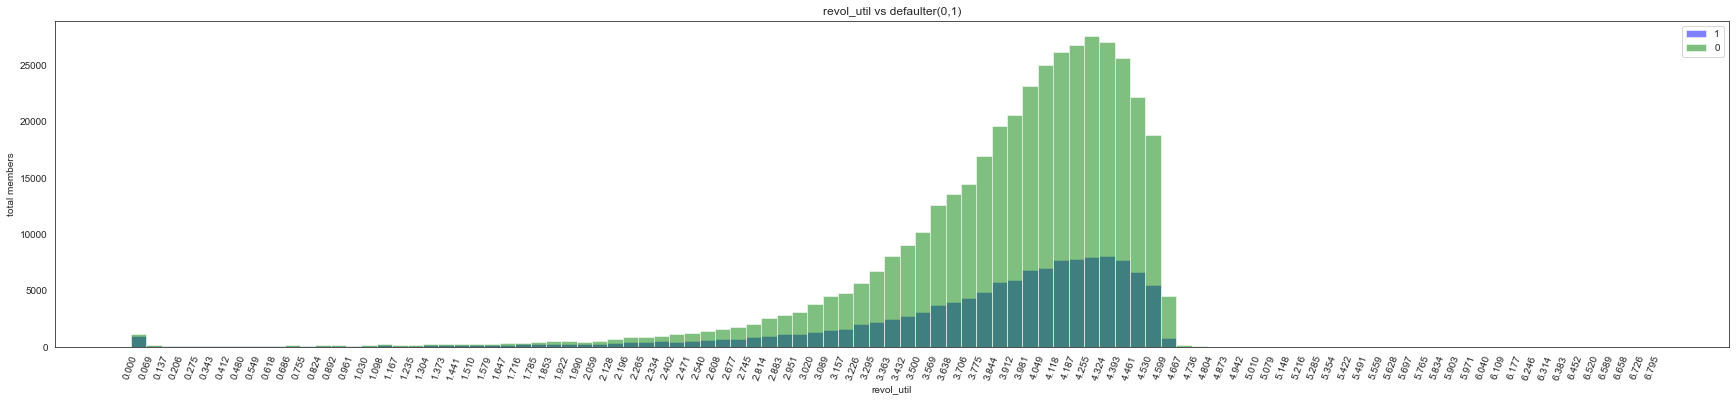

In [88]:
plot_hist(df,'revol_util',100,True)

In [89]:
# plot_boxes(df,'revol_util')

In [90]:
descp(df,'tot_coll_amt')

count    490424.000000
mean        213.562222
std        1958.571538
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      496651.000000
Name: tot_coll_amt, dtype: float64
max 496651.0
min 0.0


0.0        420903
50.0         1053
100.0         815
75.0          631
150.0         418
            ...  
9851.0          1
4913.0          1
21711.0         1
10335.0         1
5022.0          1
Name: tot_coll_amt, Length: 8081, dtype: int64

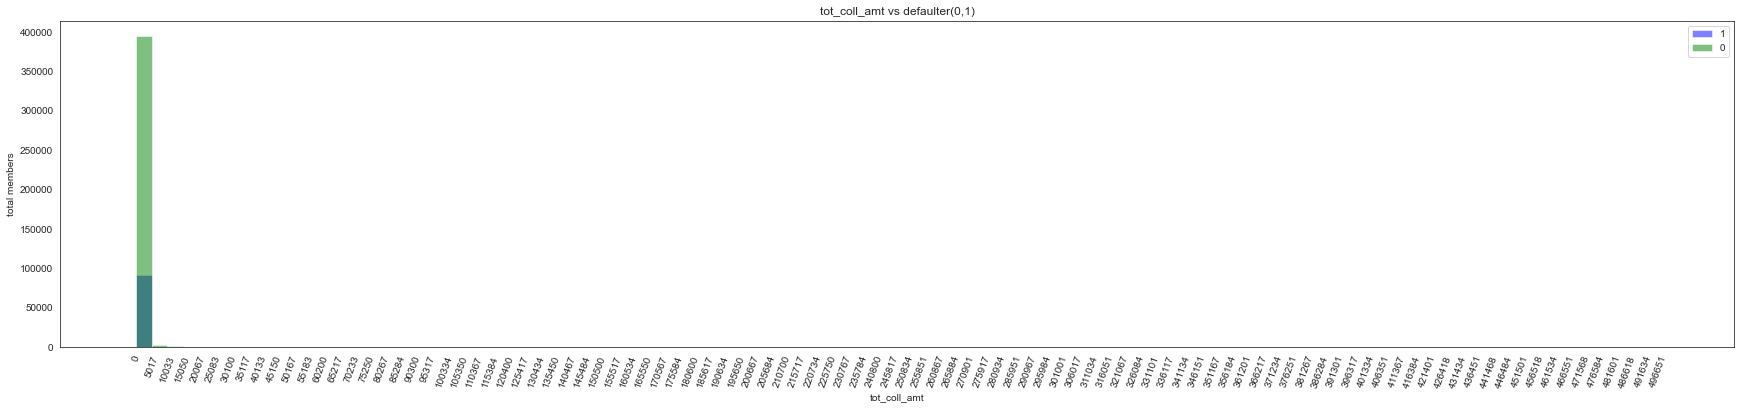

In [91]:
plot_hist(df,'tot_coll_amt',100)

In [92]:
descp(df,'tot_cur_bal')

count    4.904240e+05
mean     1.395541e+05
std      1.539149e+05
min      0.000000e+00
25%      2.983975e+04
50%      8.066950e+04
75%      2.084792e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64
max 8000078.0
min 0.0


0.0         78
14511.0     17
27316.0     15
19998.0     15
5537.0      15
            ..
145340.0     1
400047.0     1
111581.0     1
435383.0     1
332986.0     1
Name: tot_cur_bal, Length: 251640, dtype: int64

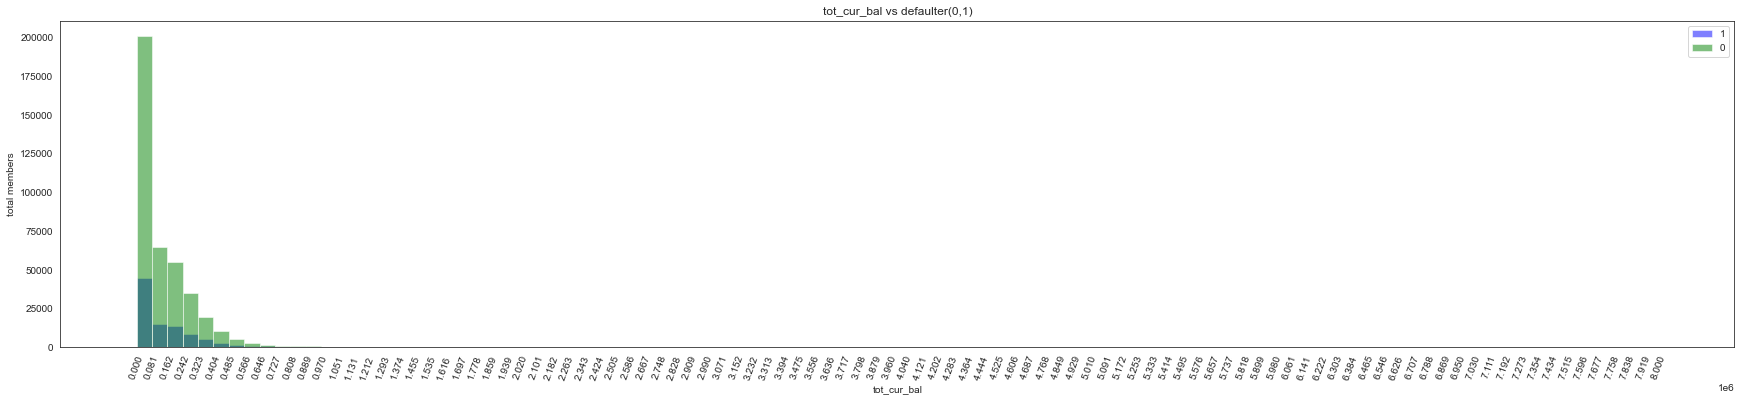

In [93]:
plot_hist(df,'tot_cur_bal',100)

In [94]:
# plot_boxes(df,'tot_cur_bal')

In [95]:
descp(df,'total_rec_int')

count    532428.000000
mean       1753.428788
std        2093.199837
min           0.000000
25%         441.600000
50%        1072.690000
75%        2234.735000
max       24205.620000
Name: total_rec_int, dtype: float64
max 24205.62
min 0.0


0.00       10953
82.76         86
174.90        78
283.29        77
319.41        76
           ...  
548.52         1
2697.67        1
2216.25        1
495.73         1
738.50         1
Name: total_rec_int, Length: 243149, dtype: int64

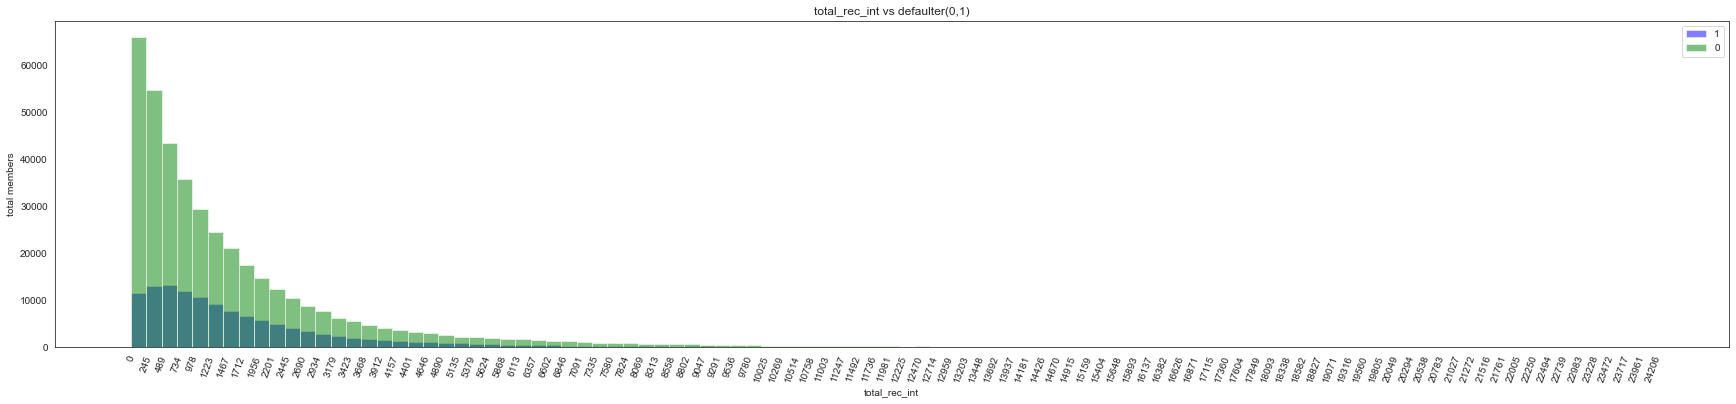

In [96]:
plot_hist(df,'total_rec_int',100)

In [97]:
# plot_boxes(df,'total_rec_int')

In [98]:
descp(df,'total_rec_late_fee')

count    532428.000000
mean          0.394954
std           4.091546
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64
max 358.68
min 0.0


0.000000     524986
15.000000      1680
30.000000       219
45.000000        31
16.370000        10
              ...  
29.759757         1
15.423498         1
36.431996         1
44.540000         1
20.290000         1
Name: total_rec_late_fee, Length: 4073, dtype: int64

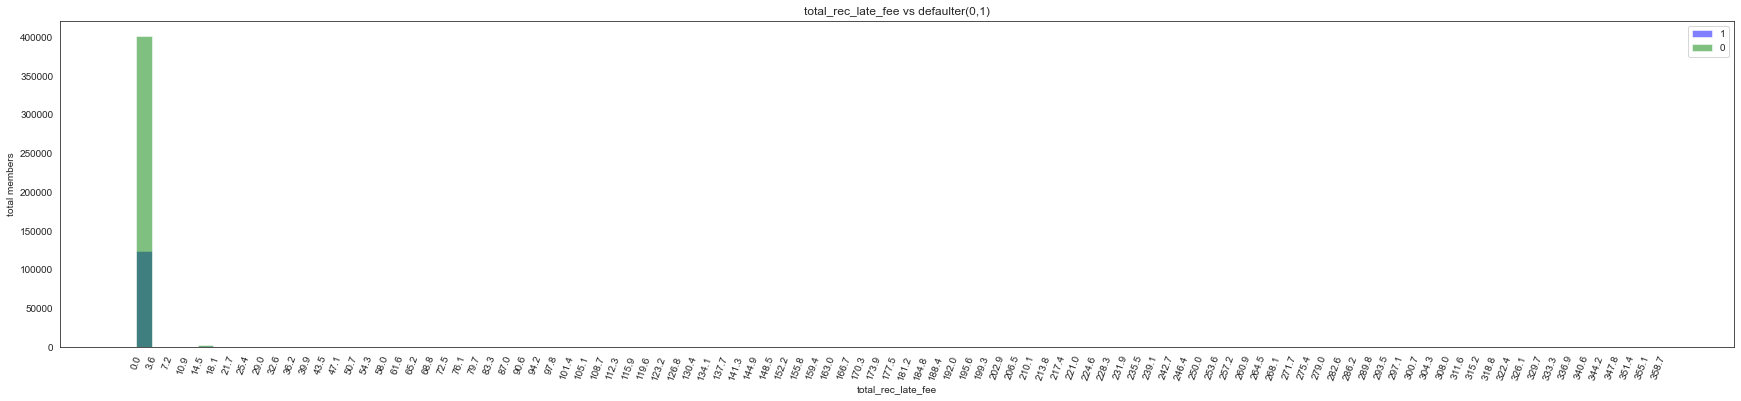

In [99]:
plot_hist(df,'total_rec_late_fee',100)

In [100]:
# plot_boxes(df,'total_rec_late_fee')